In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# 데이터 불러오기
data = pd.read_csv('filtered_data.csv')

In [16]:
# 시간대별 category name 빈도수 계산
time_category = data.groupby(['UTC time', 'Venue category name']).size().unstack()

In [17]:
# 1. datetime 열을 datetime 자료형으로 변환
data['datetime'] = pd.to_datetime(data['UTC time'])

In [18]:
# 2. 시간(hour) 정보 추출
data['hour'] = data['datetime'].dt.hour

In [19]:
# 3. 1시간 단위로 데이터 그룹화 후, 카테고리별 체크인 수 계산
hourly_category_counts = data.groupby(['hour', 'Venue category name'])['Venue ID'].count()

In [20]:
# 각 시간대별로 가장 많이 등장한 카테고리 상위 5개 추출
top5 = data.groupby(['hour', 'Venue category name'])['UserID'].count().reset_index()
top5 = top5.sort_values(['hour', 'UserID'], ascending=[True, False])
top5 = top5.groupby('hour').head(5)
top5 = top5.pivot(index='hour', columns='Venue category name', values='UserID')
top5 = top5.fillna(0)
top5 = top5.astype(int)

In [21]:
# 1시간 단위로 데이터 그룹화
grouped_data = data.groupby(["hour", "Venue category name"]).size().reset_index(name="count")

In [22]:
# 시간대별로 가장 많이 나온 카테고리 3개 추출

top_categories = []
for hour in range(24):
    # 해당 시간대의 데이터만 추출
    hour_data = grouped_data[grouped_data["hour"] == hour]
    # 카테고리별로 count 기준 내림차순 정렬 후 상위 3개만 추출
    top_categories_hour = hour_data.groupby("Venue category name").sum().sort_values("count", ascending=False).head(5)
    top_categories.append(top_categories_hour.index.tolist())

시각화

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# 시간대별, 카테고리별 방문 빈도수 계산
freq = data.groupby(['hour', 'Venue category name'])['Venue category name'].count().reset_index(name='count')

In [25]:
# 시간대별로 가장 많이 방문한 카테고리 상위 5개 추출
top5 = freq.groupby('hour').apply(lambda x: x.nlargest(5, columns=['count'])).reset_index(drop=True)

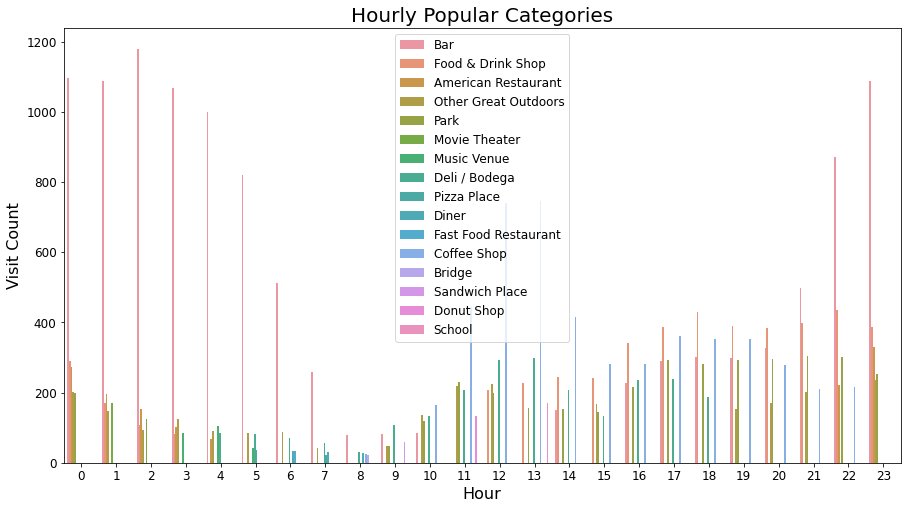

In [26]:
# 그래프 그리기
plt.figure(figsize=(15, 8))
sns.barplot(x='hour', y='count', hue='Venue category name', data=top5)
plt.title("Hourly Popular Categories", fontsize=20)
plt.xlabel("Hour", fontsize=16)
plt.ylabel("Visit Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

액티브유저 패턴추출

In [28]:
# 데이터 불러오기
data = pd.read_csv('active_users_total.csv')

In [29]:
# 삭제할 항목 리스트 생성
words_to_remove = ['Office', 'Home (private)','private' ,'Train Station', 'Bank', 'Subway', 'Hotel', 'Gym / Fitness Center', 
                        'Road', 'Medical Center', 'Building', 'Financial or Legal Service', 'Airport', 'Hardware Store', 
                        'Airport', 'Post Office', 'Gas Station / Garage', 'Drugstore / Pharmacy', 'Athletic & Sport', 
                        'Neighborhood', 'Electronics Store', 'Mobile Phone Shop', 'Automotive Shop', 'Parking', 'Clothing Store',
                        'Bus Station']

In [30]:
# 특정 단어를 포함하는 카테고리 삭제
for word in words_to_remove:
    data = data[~data['Venue category name'].str.contains(word)]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [31]:
# 결과를 파일로 저장
data.to_csv('active_filtered_data.csv', index=False)

In [32]:
# 시간대별 category name 빈도수 계산
time_category = data.groupby(['UTC time', 'Venue category name']).size().unstack()

# 1. datetime 열을 datetime 자료형으로 변환
data['datetime'] = pd.to_datetime(data['UTC time'])

# 2. 시간(hour) 정보 추출
data['hour'] = data['datetime'].dt.hour

# 3. 1시간 단위로 데이터 그룹화 후, 카테고리별 체크인 수 계산
hourly_category_counts = data.groupby(['hour', 'Venue category name'])['Venue ID'].count()



In [33]:
# 각 시간대별로 가장 많이 등장한 카테고리 상위 5개 추출
top5 = data.groupby(['hour', 'Venue category name'])['UserID'].count().reset_index()
top5 = top5.sort_values(['hour', 'UserID'], ascending=[True, False])
top5 = top5.groupby('hour').head(5)
top5 = top5.pivot(index='hour', columns='Venue category name', values='UserID')
top5 = top5.fillna(0)
top5 = top5.astype(int)

In [34]:
# 1시간 단위로 데이터 그룹화
grouped_data = data.groupby(["hour", "Venue category name"]).size().reset_index(name="count")

In [35]:
# 시간대별로 가장 많이 나온 카테고리 5개 추출

top_categories = []
for hour in range(24):
    # 해당 시간대의 데이터만 추출
    hour_data = grouped_data[grouped_data["hour"] == hour]
    # 카테고리별로 count 기준 내림차순 정렬 후 상위 5개만 추출
    top_categories_hour = hour_data.groupby("Venue category name").sum().sort_values("count", ascending=False).head(5)
    top_categories.append(top_categories_hour.index.tolist())

시각화

In [36]:
# 시간대별, 카테고리별 방문 빈도수 계산
freq = data.groupby(['hour', 'Venue category name'])['Venue category name'].count().reset_index(name='count')

In [37]:
# 시간대별로 가장 많이 방문한 카테고리 상위 5개 추출
top5 = freq.groupby('hour').apply(lambda x: x.nlargest(5, columns=['count'])).reset_index(drop=True)

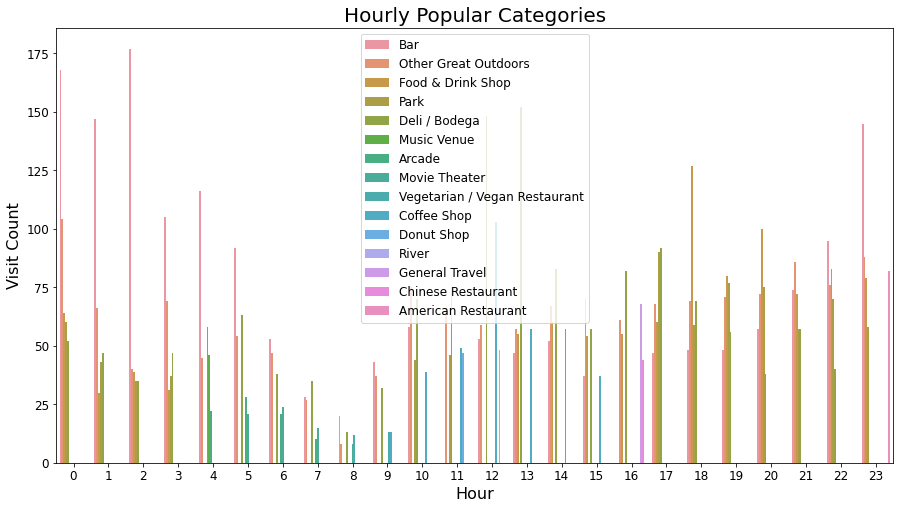

In [38]:
# 그래프 그리기
plt.figure(figsize=(15, 8))
sns.barplot(x='hour', y='count', hue='Venue category name', data=top5)
plt.title("Hourly Popular Categories", fontsize=20)
plt.xlabel("Hour", fontsize=16)
plt.ylabel("Visit Count", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()